# Monte Carol Method

In this article, I discuss Monte Carol Methods in 4 points: (1). The definition of Monte Carol Methods is given. (2). Why we need Monte Carol Methods? (3). The relationship between Law of Large Number, Center Limit Theorem and Monte Carol Methods. (4) What's the applications of Monte Carol Methods?

### 1. What's the Monte Carol Methods?

**(The definition):** Monte Carol Methods are broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. Their essential idea is using randomness to solve problem that might be deterministic in principle.

#### 1.1 Esitmate circle area without knowing $\pi$.

**(Example:)** Assume that we don't know the value of $\pi$, but we still want to know the area of an circle. How to do that? The basic idea is that we repeatedly toss a coin in the unit square up to 100000 times and calculate how many coins fall inside the circle.

Area of the circle =  1.57264
pi =  3.141592653589793


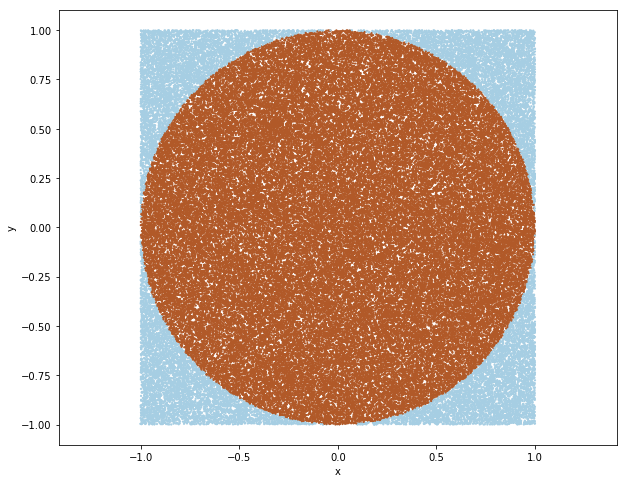

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## The bounding box area
bounding_area = 2

## Total number of samples
N_total = 100000

# Drawing random point points uniform between -1 and 1
X  = np.random.uniform(low=-1, high=1, size=N_total)
Y  = np.random.uniform(low=-1, high=1, size=N_total)

# check if point is inside the circle
distance = np.sqrt(X**2+Y**2)
is_point_inside = distance < 1

# sum up the hits inside the circle
N_insize = np.sum(is_point_inside)

# estimate the circle area 
circle_area = bounding_area * N_insize/N_total

# some nice visualization
plt.figure(figsize=(10,8))
plt.scatter(X,Y, c=is_point_inside, s=5.0, edgecolors='none', cmap=plt.cm.Paired)  
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
# text output
print("Area of the circle = ", circle_area)
print("pi = ", np.pi)

#### 1.2 Estimate the erea of the curve.

The area under the curve is: 1.57264


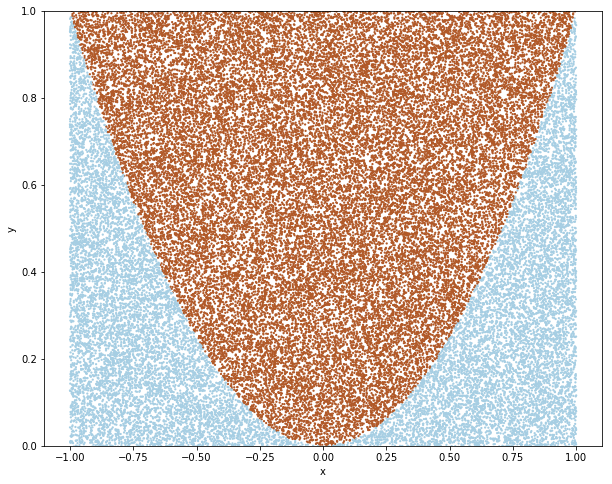

In [17]:
## the target function is y=x^2

X = np.random.uniform(low=-1, high=1, size=N_total)
Y = np.random.uniform(low=-1, high=1, size=N_total)

## if the point under the curve
is_point_under = Y>X**2

## summation
N_size = np.sum(is_point_inside)

## the area under the curve
area = 2*N_size/N_total

##plot the figure
plt.figure(figsize=(10,8))
#plt.plot(X,X**2,'r-')
plt.scatter(X, Y, c=is_point_under,s=5.0, edgecolors='none', cmap=plt.cm.Paired)  
plt.ylim([0,1])
plt.xlabel('x')
plt.ylabel('y')

## The area under the curve
print('The area under the curve is:',area)

### 2. Why can random sampling obtain numerical results we expect?

#### 2.1 Law of Large Number
`（Law of Large Number）:` Given `i.i.d` samples $x_{1},...,x_{n}$ from random variable $X$, which has finite mean $\mu$. Let:

$$
\begin{equation}
S_{n}=\frac{1}{N}\sum_{i=1}^{n}x_{i}
\end{equation}
$$

Then

$$
\begin{equation}
S_{n}\rightarrow \mu \text{ as } n\rightarrow \infty
\end{equation}
$$

**LLN** tell us that the sample mean will approximate the underlying mean as $n\rightarrow \infty$. In other words, we can use sample mean to replace with the true mean when we has large sample size *N*. Thus, we can simply obtain the result instead of integration. There's an example below:

**(Example):** Calculate the expectation $\mathbb{E}[X]$:

The definition of expectation $\mathbb{E}[X]$:

$$
\begin{equation}
\mathbb{E}_{f}[X]=\begin{cases}
\sum xf(x), \text{ If X is discrete} \\
\int xf(x)dx, \text{ If X is continuous}
\end{cases}
\end{equation}
$$

**Theorem:** If $Y=r(X)$, then $\mathbb{E}_{f}[Y]=\int r(x)f(x)dx$.

*(Application: Probability as expectation):*If $A$ be an event and let $r(x)=I_{A}(x)$(Indicator for event A).

Then:

$$
\begin{equation}
E_{f}[I_{A}(X)]=\int I_{A}dF(x) = \int_{A}f_{X}(x)dx=p(X\in A)
\end{equation}
$$

#### 2.2 Center Limit Theorem

`LLN` just tell us that the sample mean will eventually converge to the true mean  as $n\rightarrow \infty$, but it do not tell us that the distance(error) variation as N increases. Actually, we use standard error of sample mean to indicate the error and this question can be answered by `Center Limit Theorem`.

**(Center Limit Theorem):** Let $x_{1},...,x_{n}$ are `iid` sample from a random variable $X$. Suppose that $X$ has finite mean $\mu$ and finite variance $\sigma^{2}$. Then:

$$
\begin{equation}
S_{n}=\frac{1}{n}\sum_{i=1}^{n}x_{i}, \text{ then }
S_{n}\sim N(\mu,\frac{\sigma^{2}}{n}) \text{ as }n\rightarrow \infty
\end{equation}
$$

Therefore, we obtain standard error $\text{Var}[\widetilde{x}]=\frac{\sigma}{\sqrt{N}}$. We can conclude that the error $\propto\frac{1}{\sqrt{n}}$.

#### 2.3 Back to Monte Carol

We want to calculate the expectation value:

$$
\widetilde{\mu}=\frac{1}{n}\sum_{i=1}^{n} f(x_{i})
$$

- the variance of sample mean will go down as $\frac{1}{n}$, and it is independent on the true variance $\text{Var}[f(x)]$. Thus, the standard error goes down as $\frac{1}{\sqrt{n}}$.

#### 3. Why do we need Monte Carol Method?
One examble we have mentioned above is that we can calculate the population mean(true mean) through sample mean, thus we advoid to compute the integration. It is very effective when it is in high dimensional case. 

Here. I just show one example: assume $0\leq x,y,z\geq 1$, the constraint is: $x+y+z\leq 1$, to compute the volume of cube $\int_{x}\int_{y}\int_{z} dxdydz$.

In [18]:
X = np.random.uniform(low=0, high=1, size=N_total)
Y = np.random.uniform(low=0, high=1, size=N_total)
Z = np.random.uniform(low=0, high=1, size=N_total)

is_point_satisfied = (X+Y+Z)<1

v = 1 * np.sum(is_point_satisfied)/N_total
print('the volume is', v)

the volume is 0.16584


In detail, there are some [summary](http://www.cs.princeton.edu/courses/archive/spr06/cos598C/papers/AndrieuFreitasDoucetJordan2003.pdf) about what Monte Carol Methods(MCMC) can do:

1. *Bayesian inference and learning.* Given some unknown variables $x\in X$ and data $y\in Y$, the following typically intractable integration problems are central to Bayesian statistics:
 - *Normalisation.* To obtain the posterior $p(x\vert y)$ given the prior $p(x)$ and likelihood $p(y\vert x)$, the normalising factor in Bayes’ theorem needs to be computed:
 
 $$
 \begin{equation}
 p(x\vert y)=\frac{p(y\vert x)p(x)}{\int_{x^{'}}p(x\vert x^{'})dx^{'}}
 \end{equation}
 $$

 - *Marginalisation.* Given the joint posterior of $(x,z) \in X\times\mathcal{Z}$, we may often be interested in the marginal posterior：
 
 $$
 \begin{equation}
 p(x\vert y)=\int_{\mathcal{Z}}p(x,z\vert y)dz
 \end{equation}
 $$

 - *Expectation.* The objective of the analysis is often to obtain summary statistics of the form:
 
 $$
 \begin{equation}
 \mathbb{E}_{p(x\vert y)}[f(x)]=\int_{\chi}f(x)p(x\vert y)dx
 \end{equation}
 $$

 for some function of interest $f : X \rightarrow R^{n_{f}}$ integrable with respect to $p(x | y)$. Examples of appropriate functions include the conditional mean, in which case $f(x) = x$, or the conditional covariance of $x$ where $f (x) = xx^{'} − \mathbb{E}_{p(x\vert y)}[x]\mathbb{E}^{'}_{p(x\vert y)}[x]$.

2. *Statistical mechanics.* Here, one needs to compute the partition function $Z$ of a system with states s and Hamiltonian $E(s)$:
 
 $$
 \begin{equation}
 Z = \sum_{s}\text{exp}(-\frac{E(s)}{kT})
 \end{equation}
 $$

 where $k$ is the Boltzmann’s constant and $T$ denotes the temperature of the system. Summing over the large number of possible configurations is prohibitively expensive(Baxter, 1982).  Note that the problems of computing the partition function and the normalising constant in statistical inference are analogous.

3. *Optimisation.* The goal of optimisation is to extract the solution that minimises some objective function from a large set of feasible solutions. In fact, this set can be continuous and unbounded. In general, it is too computationally expensive to compare all the solutions to find out which one is optimal.
 
4. *Penalised likelihood model selection.* This task typically involves two steps. First, one finds the maximum likelihood (ML) estimates for each model separately. Then one uses a penalisation term (for example MDL, BIC or AIC) to select one of the models. The problem with this approach is that the initial set of models can be very large. Moreover, many of those models are of not interest and, therefore, computing resources are wasted.